In [93]:
import pandas as pd
import numpy as np
%matplotlib inline
import renders as rs
from IPython.display import display 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [94]:
df = pd.read_csv("Final_Data_Ben.csv")

In [1]:
# df.columns

In [96]:
df['ajusted_time_mean']=pd.to_datetime(df['ajusted_time_mean'])

In [97]:
df = df.fillna(0)

day from 0 to 6 with zero being monday

In [98]:
df[df.columns[25:39]] =df[df.columns[25:39]].astype(bool)

adjusting the output variables to true/false

In [99]:
df['diet'] = (df['DMD'] | df['DSM'] | df['DP'])

In [100]:
df['weekday']= df['ajusted_time_mean'].dt.weekday

In [101]:
df['hour']= df['ajusted_time_mean'].dt.hour

In [2]:
# df.head()

In [103]:
df = df.drop('Unnamed: 0', axis=1)

In [104]:
df=df.drop('ajusted_time_mean', axis=1)

In [105]:
df=df.drop('key', axis = 1)
df=df.drop('event', axis =1)
df=df.drop('diff', axis=1)
df=df.drop('diff2', axis=1)
df=df.drop('diff_mean', axis=1)
df=df.drop('event_est', axis=1)
df=df.drop('flag1_e', axis=1)
df=df.drop('flag1_s', axis=1)
df=df.drop('flag1_m', axis=1)

In [106]:
df=df.drop('local_time_min', axis =1)
df=df.drop('local_time_mean', axis =1)
df=df.drop('time_min', axis =1)
df=df.drop('time_mean', axis =1)
df=df.drop('ajusted_time_min', axis=1)

In [107]:
df=df.drop('u_id',axis=1)

In [108]:
df = df[df.columns.drop(list(df.filter(regex='min')))]

In [109]:
df = df[df.columns.drop(list(df.filter(regex='max')))]

In [44]:
df.to_csv('rowdropped.csv')

In [111]:
min_max_scaler = MinMaxScaler(feature_range=(0, 100))
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [3]:
# scaleColumns(df, ['face_size_mean'])

In [113]:
df = df.astype(int)

In [4]:
# df.columns

combination, exotic drinks, diet drinks, teas, waters, 

In [6]:
# df.head()

In [116]:
new_data = df.drop(df.columns[8:28], axis=1)

In [117]:
new_feature=pd.DataFrame(df.loc[:,var])

In [5]:
# df

# trying out random forest

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from IPython.display import display, Image
import pydotplus
from sklearn import tree

In [120]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [7]:
# dep_vars

# trying to run all variables as dependent for random forest

In [8]:
# Create list to iterate through
dep_vars = list(df.columns[8:28]) 
# Try each var as the dependant var
for var in dep_vars:
    #make a copy of the DF, drop the select feature
    #new_data=df.drop([var], axis=1)   #created new_data above
    
    #create feature series(vector)
    new_feature=pd.DataFrame(df.loc[:,var])
    
    #Split data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(
        new_data, new_feature, test_size=0.25, random_state=42, stratify=new_feature)
    
    #run random forest and fit to training set
    rf = randomForest.set_params(n_estimators=8000, random_state=42, class_weight='balanced')
    #fit
    rf.fit(X_train, y_train)
    #return score
    print("The training error of %s random forest is: %.5f" %(var, 1 - randomForest.score(X_train, y_train)))
    print("The test error of %s random forest is: %.5f" %(var, 1 - randomForest.score(X_test, y_test)))
    feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
    
    dtype = [('feature', 'S10'), ('importance', 'float')]
    feature_importance = np.array(feature_importance, dtype=dtype)
    feature_sort = np.sort(feature_importance, order='importance')[::-1]
    print([i for (i, j) in feature_sort[0:10]])
    
    predicted = randomForest.predict(X_test)
    cm = confusion_matrix(y_true = y_test, y_pred = predicted)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,
                   s=cm[i,j],
                   va='center',
            ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()
    
    

# trying out gradient boosting

In [128]:
# Create list to iterate through
dep_vars = list(df.columns[8:28]) #added [8:22]
# Try each var as the dependant var
for var in dep_vars:
    #make a copy of the DF, drop the select feature
    #new_data=df.drop([var], axis=1)   #created new_data above
    
    #create feature series(vector)
    new_feature=pd.DataFrame(df.loc[:,var])
    
    #Split data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(
        new_data, new_feature, test_size=0.5, random_state=42, stratify=new_feature)
    
    #create the random forest and fit to training set
    rf = randomForest.set_params(n_estimators=50, random_state=42, class_weight='balanced')
    #fit
    rf.fit(X_train, y_train)
    #return score
    print("The training error of %s random forest is: %.5f" %(var, 1 - randomForest.score(X_train, y_train)))
    print("The test error of %s random forest is: %.5f" %(var, 1 - randomForest.score(X_test, y_test)))
    feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
    dtype = [('feature', 'S10'), ('importance', 'float')]
    feature_importance = np.array(feature_importance, dtype=dtype)
    feature_sort = np.sort(feature_importance, order='importance')[::-1]
    print([i for (i, j) in feature_sort[0:10]])
    
    predicted = randomForest.predict(X_test)
    cm = confusion_matrix(y_true = y_test, y_pred = predicted)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,
                   s=cm[i,j],
                   va='center',
            ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

In [256]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

Checking R2 score for all possible vars

In [9]:
# Create list to loop through
dep_vars = list(df.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # Make a copy of the DF, drop the given feature
    new_data = df.drop([var], axis = 1)


    # Create feature Series (Vector)
    new_feature = pd.DataFrame(df.loc[:, var])


    # test/train split
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # fit decision tree to train
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    #return r2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

In [10]:
# pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (25,16), diagonal = 'kde');

In [11]:
# df.hist(bins=30, figsize =(15,10))
# plt.tight_layout()
# plt.show()

In [440]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [12]:
# good_data

scaling x vars for use in PCA

In [130]:
good_data = scaleColumns(new_data, new_data)

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
#good_data=StandardScaler().fit_transform(good_data)

In [133]:
from sklearn.decomposition import PCA

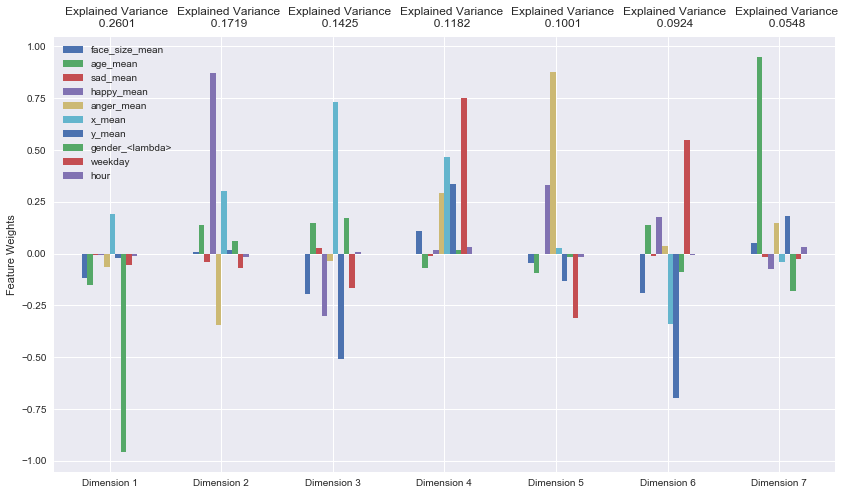

In [134]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=7) #was 6
# Fit
pca.fit(new_data) #was good_data

# TODO: Transform the sample log-data using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [135]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,face_size_mean,age_mean,sad_mean,happy_mean,anger_mean,x_mean,y_mean,gender_<lambda>,weekday,hour
Dimension 1,0.2601,-0.1171,-0.1533,-0.0078,-0.0066,-0.0671,0.1903,-0.0216,-0.9581,-0.0573,-0.0140
Dimension 2,0.1719,0.0077,0.1375,-0.0430,0.8716,-0.3458,0.3012,0.0166,0.0596,-0.0713,-0.0144
Dimension 3,0.1425,-0.1952,0.1462,0.0280,-0.3026,-0.0376,0.7294,-0.5073,0.1711,-0.1675,0.0065
Dimension 4,0.1182,0.1086,-0.0702,-0.0106,0.0185,0.2935,0.4683,0.3365,0.0175,0.7503,0.0307
Dimension 5,0.1001,-0.0451,-0.0934,-0.0010,0.3301,0.8747,0.0289,-0.1329,-0.0156,-0.3098,-0.0191
Dimension 6,0.0924,-0.1892,0.1361,-0.0096,0.1763,0.0365,-0.3412,-0.6978,-0.0871,0.5497,-0.0076
Dimension 7,0.0548,0.0522,0.9501,-0.0165,-0.0724,0.1474,-0.0385,0.1792,-0.1785,-0.0283,0.0316


pandas.core.frame.DataFrame

Dimension 1    0.2601
Dimension 2    0.4320
Dimension 3    0.5745
Dimension 4    0.6927
Dimension 5    0.7928
Dimension 6    0.8852
Dimension 7    0.9400
Name: Explained Variance, dtype: float64

In [136]:
# fit PCA by on good data with two dimensions
pca = PCA(n_components=2)
pca.fit(new_data)

# Transform good data using the PCA fit
reduced_data = pca.transform(new_data)

# Create a DF for reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [137]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

gradient boosting on the reduced data #changed, wasn't informative enough, now on regular data

In [13]:
# reduced_data

# # Create list to iterate through
# dep_vars = list(df.columns[8:28]) #added [8:22]
# # Try each var as the dependant var
# for var in dep_vars:
#     #make a copy of the DF, drop the select feature
#     #new_data=df.drop([var], axis=1)   #created new_data above
    
#     #create feature series(vector)
#     new_feature=pd.DataFrame(df.loc[:,var])
    
#     #Split data into test and train sets
#     X_train, X_test, y_train, y_test = train_test_split(
#         new_data, new_feature, test_size=0.25, random_state=42, stratify=new_feature)
    
#     #create the gb and fit to training set
#     params = {'n_estimators': 500, 'max_depth': 6,
#         'learning_rate': 0.01, 'loss': 'huber','alpha':0.95}
#     gb = GradientBoostingRegressor(**params)
#     #fit
#     gb.fit(X_train, y_train)
#     #return score
#     print("The training error of %s gradient boost is: %.5f" %(var, gb.score(X_train, y_train)))
#     print("The test error of %s gradient boost is: %.5f" %(var, gb.score(X_test, y_test)))
#     feature_importance = list(zip(X_train.columns[:-2], gb.feature_importances_))
#     dtype = [('feature', 'S10'), ('importance', 'float')]
#     feature_importance = np.array(feature_importance, dtype=dtype)
#     feature_sort = np.sort(feature_importance, order='importance')[::-1]
#     print([i for (i, j) in feature_sort[0:10]])
    
#     predicted = gb.predict(X_test)
#     cm = confusion_matrix(y_true = y_test, y_pred = predicted.round())
#     fig, ax = plt.subplots(figsize=(5,5))
#     ax.matshow(cm, cmap=plt.cm.Blues, alpha=.3)
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(x=j, y=i,
#                    s=cm[i,j],
#                    va='center',
#             ha='center')
#     plt.xlabel('predicted label')
#     plt.ylabel('true label')
#     plt.show()

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

In [ ]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean') #mahalanobis
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

In [503]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters,
                                                                             score))

For n_clusters = 2. The average silhouette_score is : 0.4580345639628241
For n_clusters = 3. The average silhouette_score is : 0.49428104229076325
For n_clusters = 4. The average silhouette_score is : 0.5193797187863733
For n_clusters = 5. The average silhouette_score is : 0.5317975756714509
For n_clusters = 6. The average silhouette_score is : 0.5122782821901627
For n_clusters = 7. The average silhouette_score is : 0.5177787345245521
For n_clusters = 8. The average silhouette_score is : 0.4725341355848358
For n_clusters = 9. The average silhouette_score is : 0.4462343220936044
For n_clusters = 10. The average silhouette_score is : 0.4585754849007205


In [506]:
from sklearn.mixture import GaussianMixture

In [15]:
# clusterer = KMeans(n_clusters=3).fit(reduced_data)
# preds = clusterer.predict(reduced_data)

In [560]:
# Create a temp dataframe from our PCA projection data "x_9d"
reduced_data['X_cluster'] = preds

In [565]:
import Color_constants
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [562]:
LABEL_COLOR_MAP = {0 : 'r',1 : 'g', 2:'blueviolet', 3:'b', 4:'y' } #, 2:'b' 

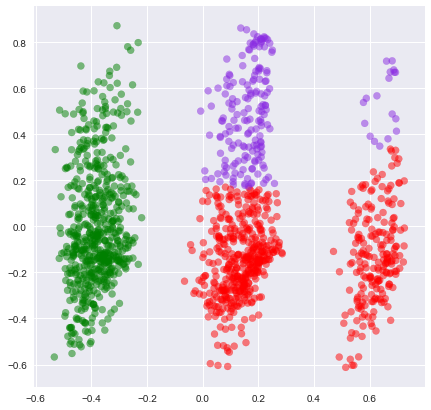

In [563]:
label_color = [LABEL_COLOR_MAP[l] for l in preds]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(reduced_data.iloc[:,0],reduced_data.iloc[:,1], c= label_color, alpha=0.5) 
plt.show()

hmm. looks like 3 gender inputs kind of screwed the pooch here (pca 1). also concerned about the 2nd and 3rd clusters. may have to look into another clustering algorithmn

/Users/bdbrunson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bdbrunson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


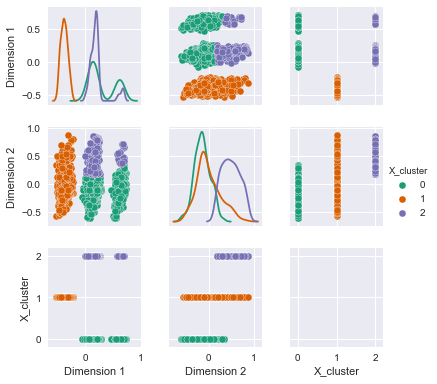

In [564]:
sns.pairplot(reduced_data, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

yeah... there's not a dimension to observe this from where the 2nd and 3rd cluster make sense

In [17]:
# # Set a 3 KMeans clustering
# kmeans = KMeans(n_clusters=2)
# # Compute cluster centers and predict cluster indices
# X_clustered = kmeans.fit_predict(x_9d)

# # Define our own color map
# LABEL_COLOR_MAP = {0 : 'r',1 : 'g' } #, 2:'b' 


# label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# # Plot the scatter digram
# plt.figure(figsize = (7,7))
# plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
# plt.show()

In [515]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers) #never logged the data

# Exponentiate the centers
true_centers = log_centers                   #was np.exp(log_centers), i never logged so took it out

# Display true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = new_data.columns)
true_centers.index = segments
display(true_centers)

,face_size_mean,age_mean,sad_mean,happy_mean,anger_mean,x_mean,y_mean,gender_<lambda>,weekday,hour
Segment 0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Segment 1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Segment 2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Segment 3,0.0,0.0,0.0,1.0,-0.0,1.0,1.0,0.0,0.0,1.0
Segment 4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


as great as this is, it's kind of meaningless.  these centers don't make any sense- happiness and x mean and y mean? Gender somewhat makes sense. the rest? not really.

# attempt 2

In [421]:
df2 = pd.read_csv('rowdropped.csv')

In [422]:
x = df2.values

In [423]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

/Users/bdbrunson/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(24, 20))
# plt.title('Pearson Correlation of EyeQ/Spire Features')
# # Draw the heatmap using seaborn
# sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [425]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [426]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [427]:
len(cum_var_exp)

30

In [492]:
cum_var_exp

array([  8.24858303,  13.96460318,  19.27103456,  23.91082789,
        28.49364014,  32.78407387,  36.83979241,  40.78511743,
        44.53697486,  48.22028977,  51.84940442,  55.44872191,
        58.98296182,  62.46109538,  65.86492121,  69.19449913,
        72.22208814,  75.19088238,  78.0848728 ,  80.94015746,
        83.6698018 ,  86.29964239,  88.7575119 ,  91.14663385,
        93.35776055,  95.38444788,  97.27274173,  98.59039237,
        99.66741636, 100.        ])

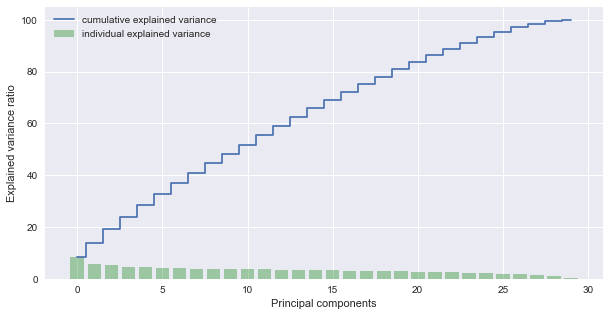

In [428]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(30), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(30), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

probably can disregard this attempt- didn't pull out the potential output variables before running

In [429]:
pca = PCA(n_components=20)
x_9d = pca.fit_transform(X_std)

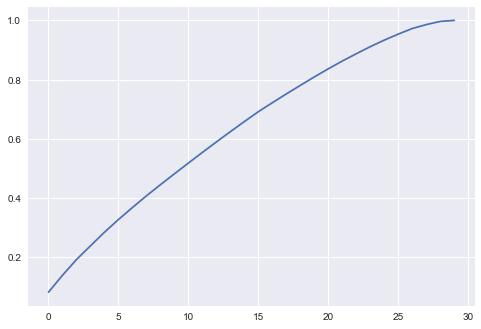

In [430]:
pca = PCA().fit(X_std) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.show() 

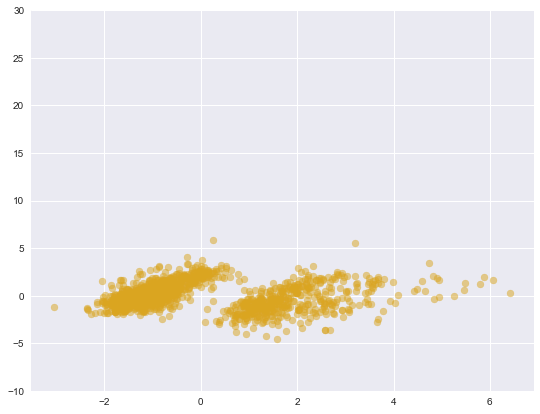

In [431]:
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

the idea here is to see if there's distinct clusters already present in the plots- see if our PCA-transformed data can be linearally seperated into different groups for use as new features. it looks like it can- there seem to be 2 at least somewhat distinct clusters here. how to use the PCA-transformed data to *do* that? i don't know.

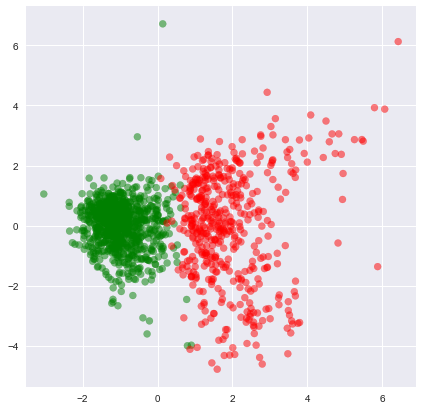

In [432]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=2)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g' } #, 2:'b' 


label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [438]:
# Create a temp dataframe from our PCA projection data "x_9d"
df3 = pd.DataFrame(x_9d)
df3 = df3[[0,1,2]] # only want to visualise relationships between first 3 projections
df3['X_cluster'] = X_clustered

/Users/bdbrunson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bdbrunson/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


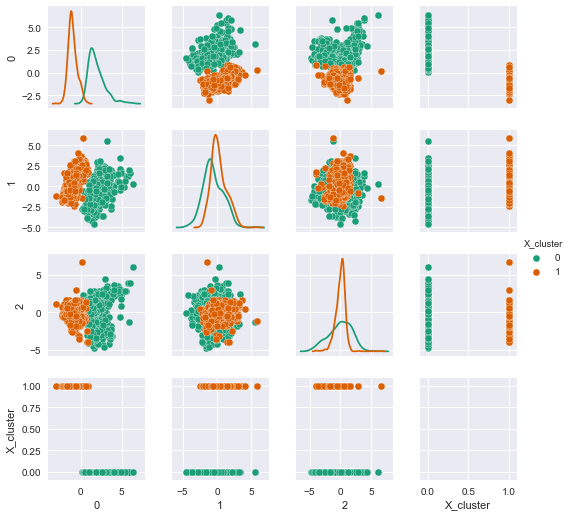

In [439]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df3, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)